<a href="https://colab.research.google.com/github/vanesher/Preferencias_Politicas/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Con Basemap

In [ ]:
! pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 101.1 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

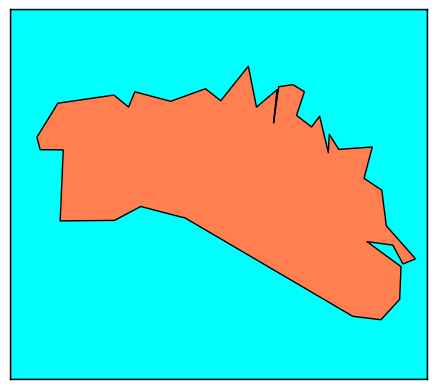

In [ ]:
map = Basemap(llcrnrlon=3.75,llcrnrlat=39.75,urcrnrlon=4.35,urcrnrlat=40.15, resolution = 'i', epsg=5520)

map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
plt.show()


##Con Folium

In [ ]:
! pip install folium

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster


In [ ]:
m = folium.Map(location=[23.645, -102.5528],zoom_start=5.3, control_scale=True)


In [ ]:
data=pd.read_csv("/content/sample_data/Prueba.csv")
data.sample(5)

latitud    longitud  persona_id partido_preferido partido_rechazado
100  18.950589  -99.222522         101               REC               MAT
58   23.994790 -104.663637          59               PVU               MAT
131  20.575273 -100.372888         132               PER               REC
38   25.923700 -103.135000          39               PER               MAT
194  20.534100  -97.443600         195               MAT               PER

In [ ]:
latitudes=data['latitud'].values.tolist()

In [ ]:
longitudes=data['longitud'].values.tolist()

In [ ]:
preferidos= data['partido_preferido'].values.tolist()

In [ ]:
rechazados=data["partido_rechazado"].values.tolist()

In [ ]:
feature_group=folium.FeatureGroup(name='Puntos de Campo')

In [ ]:
for lat,lon,tagp,tagr in zip(latitudes,longitudes,preferidos,rechazados):
  fLat=float(lat)
  fLon=float(lon)
  if tagp=="MAT":
    folium.Circle(location=[fLat,fLon],color='lightblue',fill_color='lightblue' , fill_opacity=1,weight=4,radius=100,popup=preferidos).add_to(feature_group)
  elif tagp=="REC":
    folium.Circle(location=[fLat,fLon],color='violet', fill_color='violet', fill_opacity=1,weight=4,radius=100,popup=preferidos).add_to(feature_group)
  elif tagp=="PER":
    folium.Circle(location=[fLat,fLon],color='lightgreen',fill_color='lightgreen',fill_opacity=1,weight=4,radius=100,popup=preferidos).add_to(feature_group)
  elif tagp=="PVU":
    folium.Circle(location=[fLat,fLon],color='beige',fill_color='beige',fill_opacity=1,weight=4,radius=100,popup=preferidos).add_to(feature_group)
  if tagr=="MAT":
    folium.Circle(location=[fLat+0.001,fLon+0.001],color='navy',fill_color='navy',weight=4,fill_opacity=1,radius=100,popup=rechazados).add_to(feature_group)
  elif tagr=="REC":
    folium.Circle(location=[fLat+0.001,fLon+0.001],color='purple',fill_color='purple',weight=4,fill_opacity=1,radius=100,popup=rechazados).add_to(feature_group)
  elif tagr=="PER":
    folium.Circle(location=[fLat+0.001,fLon+0.001],color='darkgreen', fill_color='darkgreen' , fill_opacity=1,weight=4,radius=100,popup=rechazados).add_to(feature_group)
  elif tagr=="PVU":
    folium.Circle(location=[fLat+0.001,fLon+0.001],color='orange',fill_color='orange',fill_opacity=1,weight=4,radius=100,popup=rechazados).add_to(feature_group)


In [ ]:
m.add_child(feature_group)


##Pruebas

In [ ]:
folium.Circle(location=[fLat,fLon], popup=tag,icon=folium.Icon(color='blue',icon='cloud')).add_to(feature_group)

In [ ]:
for lat,lon,tagp,tagr in zip(latitudes,longitudes,preferidos,rechazados):
  fLat=float(lat)
  fLon=float(lon)
  if tagp=="MAT":
    folium.Circle(location=[fLat,fLon],popup=tagp,icon=folium.Icon(color='blue',icon='cloud')).add_to(feature_group)
  elif tagp=="REC":
    folium.Circle(location=[fLat,fLon],popup=tagp,icon=folium.Icon(color='red',icon='cloud')).add_to(feature_group)
  elif tagp=="PER":
    folium.Circle(location=[fLat,fLon],popup=tagp,icon=folium.Icon(color='green',icon='cloud')).add_to(feature_group)
  if tagr=="MAT":
    folium.Circle(location=[fLat+0.001,fLon+0.001],popup=tagr,icon=folium.Icon(color='blue',icon='asterisk')).add_to(feature_group)
  elif tagr=="REC":
    folium.Circle(location=[fLat,fLon],popup=tagr,icon=folium.Icon(color='red',icon='asterisk')).add_to(feature_group)
  elif tagr=="PER":
    folium.Circle(location=[fLat,fLon],popup=tagr,icon=folium.Icon(color='green',icon='asterisk')).add_to(feature_group)

